# Lectura y visualización de ERA5

## Importat librerias **`xarray`**

In [1]:
import xarray as xr

## Leer datos

In [2]:
ds = xr.open_dataset('../data/ERA5_PE_2020.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 89, time: 4)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * time       (time) datetime64[ns] 2020-06-01 ... 2020-06-01T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-05 21:55:43 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

Usando **`xarray`** podemos visualizar nuestros datos más estructurados. Veamos la estructura de nuestros datos. Este se conforma por coordenadas, variables y atributos.

In [3]:
ds.t2m.head()

<xarray.DataArray 't2m' (time: 4, latitude: 5, longitude: 5)>
array([[[298.7085 , 298.70618, 298.74133, 298.7552 , 298.76498],
        [298.56555, 298.61627, 298.64392, 298.6635 , 298.68484],
        [298.4134 , 298.46005, 298.5206 , 298.54422, 298.51712],
        [298.19666, 298.32175, 298.37247, 298.335  , 298.29407],
        [297.97763, 298.01108, 298.02835, 298.04047, 298.0053 ]],

       [[298.78745, 298.80475, 298.8497 , 298.87506, 298.85776],
        [298.67218, 298.65662, 298.69754, 298.69925, 298.6762 ],
        [298.42432, 298.38513, 298.42432, 298.42432, 298.36554],
        [298.184  , 298.1938 , 298.22662, 298.19955, 298.13672],
        [298.04105, 297.9886 , 297.93384, 297.88486, 297.84393]],

       [[298.79782, 298.80762, 298.8111 , 298.86008, 298.8307 ],
        [298.6589 , 298.67853, 298.6572 , 298.6589 , 298.63528],
        [298.44046, 298.4324 , 298.40128, 298.403  , 298.38168],
        [298.16495, 298.15112, 298.14536, 298.0808 , 298.0024 ],
        [297.88947, 297.8134 , 297.78397, 297.76266, 297.739  ]],

       [[299.1938 , 299.08658, 299.0941 , 299.13156, 299.0843 ],
        [299.01398, 298.83643, 298.85776, 298.8889 , 298.83817],
        [298.8324 , 298.62375, 298.59207, 298.60416, 298.54538],
        [298.51425, 298.3909 , 298.3108 , 298.23123, 298.18802],
        [298.2347 , 298.08426, 297.98282, 297.9402 , 297.91077]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 -84.25 -84.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 1.0
  * time       (time) datetime64[ns] 2020-06-01 ... 2020-06-01T18:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

Ahora vamos a hacer una figura usando la función **`plot`** dentro de **`xarray`**.

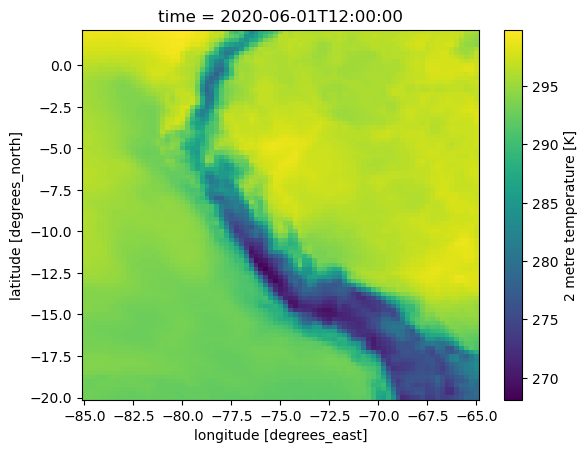

In [4]:
# Vamos a seleccionar el tiempo 1 y conservar los lons y lats.
ds['t2m'][2].plot()

### Vamos importar algunas funciones de **`cartopy`**

In [5]:
from cartopy.io.shapereader import Reader as ShapeReader
from cartopy.crs import PlateCarree

Vamos a definir una proyección para usarlo luego.

In [6]:
projection = PlateCarree()

###  Importamos **`numpy`** para hacer algunas operaciones

In [7]:
import numpy as np

Por ejemplo convertimos la temperatura de **°K** para **°C**. Además, creamos como matrices la latitud y longitud. 

In [8]:
T = ds['t2m'][0]-273.16
U = ds['u10'][0]
V = ds['v10'][0]

lat = ds['latitude']
lon = ds['longitude']
lon, lat = np.meshgrid(lon, lat)


In [9]:
lon

array([[-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       ...,
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ]],
      dtype=float32)

In [10]:
lat

array([[  2.  ,   2.  ,   2.  , ...,   2.  ,   2.  ,   2.  ],
       [  1.75,   1.75,   1.75, ...,   1.75,   1.75,   1.75],
       [  1.5 ,   1.5 ,   1.5 , ...,   1.5 ,   1.5 ,   1.5 ],
       ...,
       [-19.5 , -19.5 , -19.5 , ..., -19.5 , -19.5 , -19.5 ],
       [-19.75, -19.75, -19.75, ..., -19.75, -19.75, -19.75],
       [-20.  , -20.  , -20.  , ..., -20.  , -20.  , -20.  ]],
      dtype=float32)

In [11]:
print('Latitudes')
print(lat.min())
print(lat.max())
print('Longitudes')
print(lon.min())
print(lon.max())



Latitudes
-20.0
2.0
Longitudes
-85.0
-65.0


### Importamos **`matplotlib`**

In [12]:
from matplotlib import pyplot as plt

Podemos ver los valores mínimo y máximo de la temperatura.

In [13]:
print(T.values.min())
print(T.values.max())

-1.7308655
28.391754


### Importamos **`cmaps`** y **`geocat.viz`**

In [14]:
import cmaps
import geocat.viz as gv

In [15]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

In [16]:
# Definir los niveles de contorno
clevs = np.linspace(T.values.min()-0.5, T.values.max()+0.5, 12, dtype=float).round() # Vector

print(clevs)

[-2.  1.  3.  6.  9. 12. 15. 18. 20. 23. 26. 29.]


In [17]:
# Importando la base del colormap para trabajar
newcmp = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                              minval=0.1,
                              maxval=0.6,
                              n=len(clevs))


### Ahora vamos a crear nuestro figura

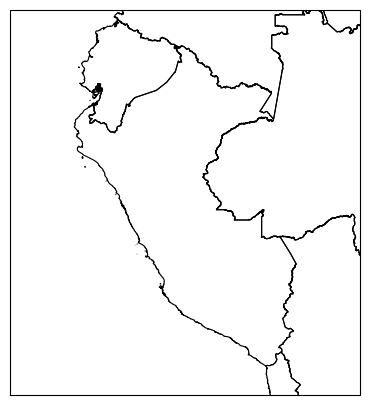

In [18]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de lon y lat de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile usando ´add_geometries´ 
fname = '../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


### Agregamos la temperatura

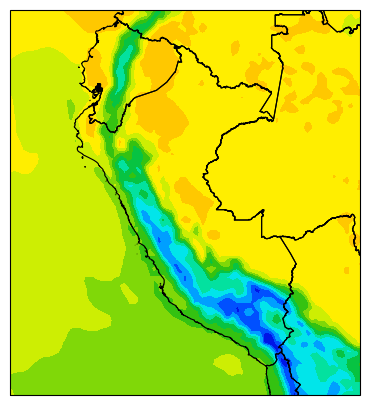

In [19]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile 
fname = '../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)

# Ahora agregamos el campo de la temperatura
cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

### Ahora agregamos la paleta de colores

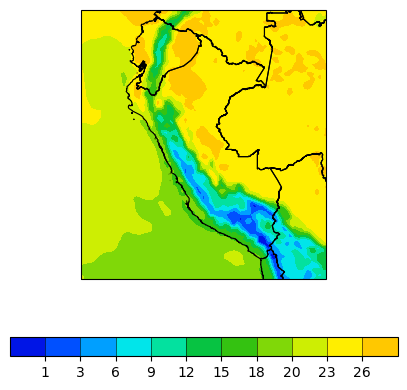

In [20]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile 
fname = '../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)

# Ahora agregamos el campo de la temperatura
cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cbar = plt.colorbar(cf,
                    ax=ax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')


### Dibujar los vectores de viento

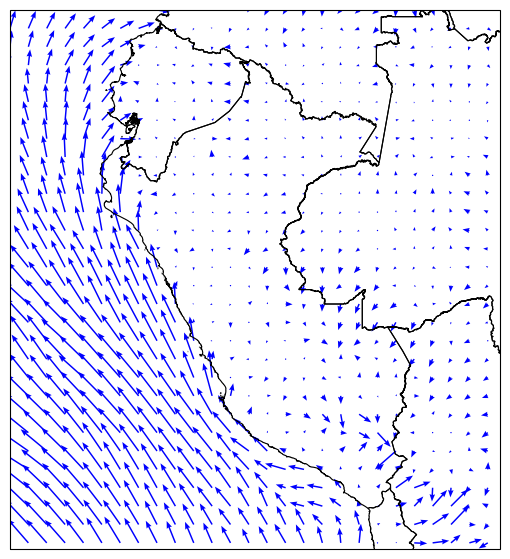

In [21]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)

# Agregamos los vectores del viento con `quiver`

dim_grid = 3
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='blue',
              width=.003, ## ancho
              scale=120.,  ## Longitud
              headwidth=3.75, ## ancho de cabeza
              )


### Ahora agregaremos alguna información del viento

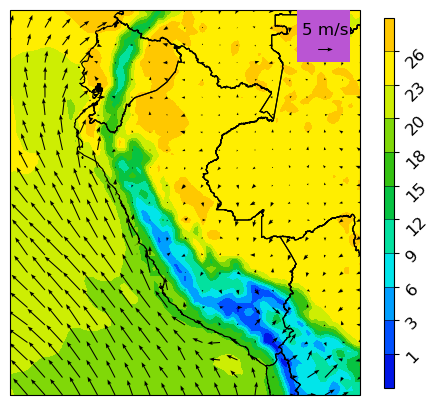

In [22]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  

## posicion x e y; ancho y alto
cax = plt.axes((0.91, 0.125, 0.02, 0.74))

cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax, # configurar la bara de color
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='vertical')

## Configurar las etiquetas
cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos los vectores del viento con quiver

dim_grid = 4
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='black',
              width=.003,
              scale=120.,
              headwidth=3.75,
              zorder=4)

# Dibujo del cuadro del vector de velocidad de referencia
rect = plt.Rectangle((-68.6, -1),
                     3,
                     3,
                     facecolor='mediumorchid',
                     edgecolor=None,
                     zorder=4)
ax.add_patch(rect)

ax.quiverkey(Q,
             0.9,
             0.9,
             5,
             '5 m/s',
             labelpos='N',
             color='black',
             coordinates='axes',
             fontproperties={'size': 12},
             labelsep=0.1)


### Ahora agregaremos las etiquetas de la lat y lon. Además guardamos nuestra figura.

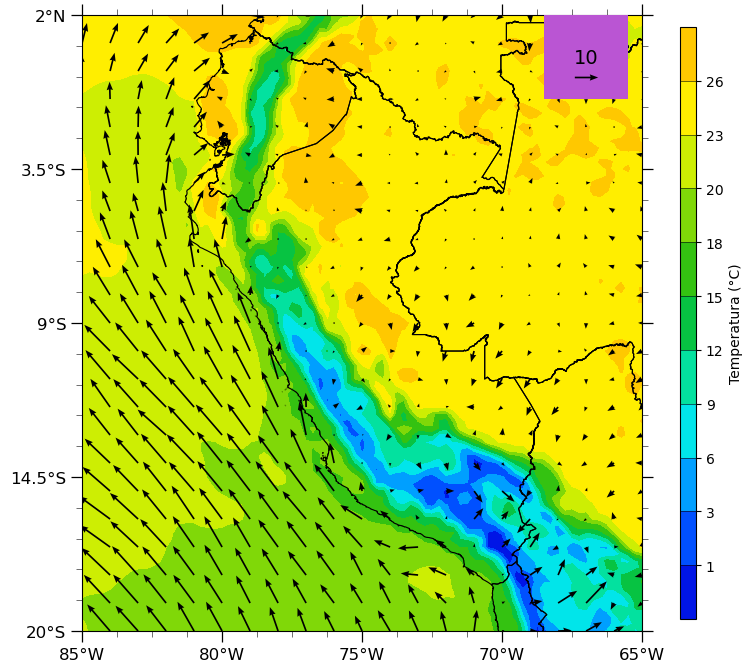

In [23]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
## posicion x e y; ancho y alto
cax = plt.axes((0.91, 0.125, 0.02, 0.74))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='vertical',
                    label='Temperatura (°C)')
#cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos los vectores del viento con quiver

dim_grid = 4
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='black',
              width=.003,
              scale=120.,
              headwidth=3.75,
              zorder=4)

# Dibujo del cuadro del vector de velocidad de referencia
rect = plt.Rectangle((-68.5, -1),
                     3,
                     3,
                     facecolor='mediumorchid',
                     edgecolor=None,
                     zorder=4)
ax.add_patch(rect)

ax.quiverkey(Q,
             0.9,
             0.9,
             5,
             '10',
             labelpos='N',
             color='black',
             coordinates='axes',
             fontproperties={'size': 14},
             labelsep=0.1)

# definimos las caracteristicas de los "ticks"
gv.set_axes_limits_and_ticks(ax,
                             xticks=np.linspace(lon.min(), lon.max(), 5),
                             yticks=np.linspace(lat.min(), lat.max(), 5))

# Adicion de las latitudes y longitudes correspondientes
gv.add_lat_lon_ticklabels(ax)

# configuración de los "ticks" mayores y menores
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=5,
                         labelsize=12)

fig.savefig('fig/Temp_202101.png', dpi = 300, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)

## Cortar el dataset para una región especifica

### Cuena de Rio Santa

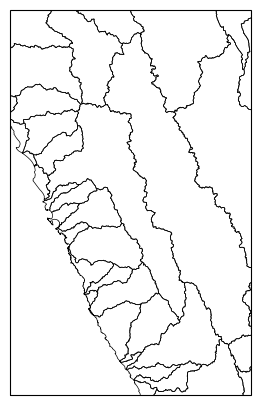

In [24]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de lon y lat de nuestra figura
ax.set_extent([-79, -76.5, -11, -7], crs=projection)

# Podemos agregar una información vectorial como un shapefile usando ´add_geometries´
fname = '../data/shapefiles/UH.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.5, crs=projection)

### Usamos **`xarray.Dataset.sel`** para cortar el dataset

In [25]:
help(xr.Dataset.sel)

Help on function sel in module xarray.core.dataset:

sel(self, indexers: Mapping[Any, Any] = None, method: str = None, tolerance: numbers.Number = None, drop: bool = False, **indexers_kwargs: Any) -> 'Dataset'
    Returns a new dataset with each array indexed by tick labels
    along the specified dimension(s).
    
    In contrast to `Dataset.isel`, indexers for this method should use
    labels instead of integers.
    
    Under the hood, this method is powered by using pandas's powerful Index
    objects. This makes label based indexing essentially just as fast as
    using integer indexing.
    
    It also means this method uses pandas's (well documented) logic for
    indexing. This means you can use string shortcuts for datetime indexes
    (e.g., '2000-01' to select all values in January 2000). It also means
    that slices are treated as inclusive of both the start and stop values,
    unlike normal Python indexing.
    
    Parameters
    ----------
    indexers : dict, opti

In [26]:
ds_crop = ds.sel(longitude=slice(-79, -76.5), latitude=slice(-7, -11))
ds_crop

<xarray.Dataset>
Dimensions:    (longitude: 11, latitude: 17, time: 4)
Coordinates:
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -77.0 -76.75 -76.5
  * latitude   (latitude) float32 -7.0 -7.25 -7.5 -7.75 ... -10.5 -10.75 -11.0
  * time       (time) datetime64[ns] 2020-06-01 ... 2020-06-01T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 0.3636 0.2875 ... 2.355 2.201
    v10        (time, latitude, longitude) float32 0.26 -0.154 ... 1.116 0.5119
    t2m        (time, latitude, longitude) float32 287.5 284.5 ... 282.2 282.5
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-05 21:55:43 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

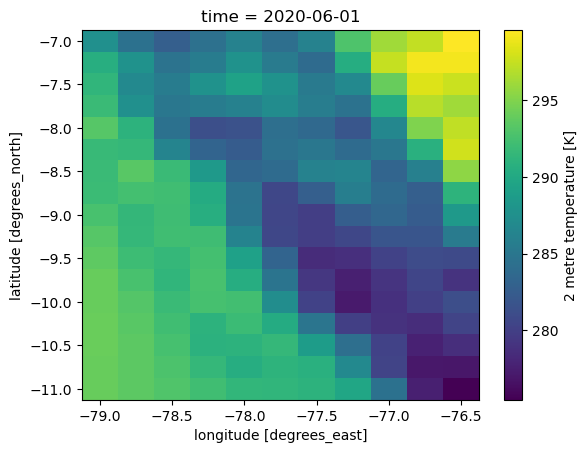

In [27]:
ds_crop.t2m[0].plot()

In [28]:
T_crop = ds_crop['t2m'][0]-273.16
U_crop = ds_crop['u10'][0]
V_crop = ds_crop['v10'][0]

lat_crop = ds_crop['latitude']
lon_crop = ds_crop['longitude']
lon_crop, lat_crop = np.meshgrid(lon_crop, lat_crop)


In [29]:
# Definir los niveles de contorno
clevs_crop = np.linspace(T_crop.values.min()-0.5, T_crop.values.max()+0.5, 12, dtype=float).round() # Vector

# Importando la base del colormap para trabajar
newcmp_crop = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                              minval=0.1,
                              maxval=0.6,
                              n=len(clevs_crop))

/home/christian/miniconda3/envs/geocat/lib/python3.9/site-packages/geocat/viz/util.py:550: UserWarning: Trying to register the cmap 'trunc(BkBlAqGrYeOrReViWh200,0.10,0.60)' which already exists.
  cm.register_cmap(name, new_cmap)


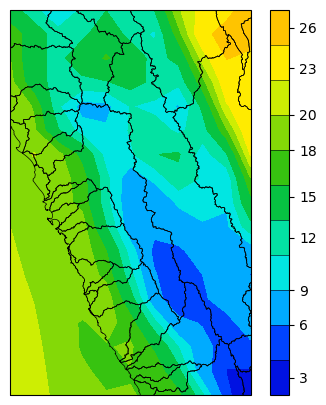

In [30]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de lon y lat de nuestra figura
ax.set_extent([-79, -76.5, -11, -7], crs=projection)

# Podemos agregar una información vectorial como un shapefile usando ´add_geometries´
fname = '../data/shapefiles/UH.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.5, crs=projection)

# Ahora agregamos el campo de la temperatura
cf = ax.contourf(lon_crop,lat_crop, T_crop.values, levels=clevs_crop, cmap=newcmp_crop, zorder=1)

#  vertical y horizontal  
cbar = plt.colorbar(cf,
                    ax=ax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='vertical')
